# Dataset Clustering


In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv("data/tweets_data.csv")[["tweetid", "tweet_text"]]

In [3]:
tweets.head()

,tweetid,tweet_text
0,1137497501194493952,RT @3v5v3: ٢_ 🔴 عسل سدر 🍯 🍯\n\n ❌ ❌ فوائ...
1,1170605961829990400,(للرجال نصيب مما ترك الوالدان والأقربون وللنسا...
2,1172783625445597184,(من كان يريد حرث الآخرة نزد له في حرثه ومن كان...
3,1122861301556969478,دائما يمثلني @kingoflaw69 👏🏻👏🏻 #البدون #اسقاط...
4,1174386089659965440,الحمدالله وأخيراً ضبط الحظ 😍 https://t.co/L9JS...


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811965 entries, 0 to 14811964
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tweetid     int64 
 1   tweet_text  object
dtypes: int64(1), object(1)
memory usage: 226.0+ MB


In [5]:
# tweet text cleaning. remove hashtags, mentions, emojis, and tashqeel

import re
import emoji

# from farasa.stemmer import FarasaStemmer

# stemmer = FarasaStemmer()


def clean_text(text):
    # links
    clean_text = re.sub(r"http\S+|t\.co/\S+", "", text)
    # mentions
    clean_text = re.sub(r"@\w+", "", clean_text)
    # hashtags
    clean_text = re.sub(r"#", "", clean_text)
    clean_text = re.sub(r"_", " ", clean_text)
    # tashqeel - from @bakriano
    clean_text = re.sub(r"[\u0617-\u061A\u064B-\u0652]", "", clean_text)
    # emojis
    clean_text = emoji.replace_emoji(clean_text, replace="")
    # remove new lines and normalize white spaces
    clean_text = re.sub(r"\s+", " ", clean_text)
    # stemming the text
    # clean_text = stemmer.stem(clean_text)
    return clean_text.strip()

In [6]:
# sample_text = "نحن أبنااااء أمة واحدة ولااابد أن نتحححححد"

In [7]:
# stemmer.stem(sample_text)

In [8]:
# %%timeit
# stemmer.stem(sample_text)

In [9]:
tweets["clean_tweet"] = tweets["tweet_text"].apply(clean_text)

In [10]:
tweets.head(40)

,tweetid,tweet_text,clean_tweet
0,1137497501194493952,RT @3v5v3: ٢_ 🔴 عسل سدر 🍯 🍯\n\n ❌ ❌ فوائ...,RT : ٢ عسل سدر فوائد عسل السدر [ للالتهابات [ ...
1,1170605961829990400,(للرجال نصيب مما ترك الوالدان والأقربون وللنسا...,(للرجال نصيب مما ترك الوالدان والأقربون وللنسا...
2,1172783625445597184,(من كان يريد حرث الآخرة نزد له في حرثه ومن كان...,(من كان يريد حرث الآخرة نزد له في حرثه ومن كان...
3,1122861301556969478,دائما يمثلني @kingoflaw69 👏🏻👏🏻 #البدون #اسقاط...,دائما يمثلني البدون اسقاط القروض لليوم 145
4,1174386089659965440,الحمدالله وأخيراً ضبط الحظ 😍 https://t.co/L9JS...,الحمدالله وأخيرا ضبط الحظ
5,1107018391850807296,سويت كل شي ياماتيتش 💔,سويت كل شي ياماتيتش
6,1115299968733143040,جوفينكو وش قاعد يسوي!!,جوفينكو وش قاعد يسوي!!
7,1180891970622885889,مدرب للبيع يعرف كل شي الا التدريب https://t.co...,مدرب للبيع يعرف كل شي الا التدريب
8,1162432096868143104,أجواء الاليانز 😍🔥,أجواء الاليانز
9,1158463519337193473,اوف لو يجي الثاني للوحدة الحين,اوف لو يجي الثاني للوحدة الحين


In [11]:
tweets.to_csv("data/clean_tweets.csv", index=False)

In [2]:
tweets = pd.read_csv("data/clean_tweets.csv")
tweets.head()

,tweetid,tweet_text,clean_tweet
0,1137497501194493952,RT @3v5v3: ٢_ 🔴 عسل سدر 🍯 🍯\n\n ❌ ❌ فوائ...,RT : ٢ عسل سدر فوائد عسل السدر [ للالتهابات [ ...
1,1170605961829990400,(للرجال نصيب مما ترك الوالدان والأقربون وللنسا...,(للرجال نصيب مما ترك الوالدان والأقربون وللنسا...
2,1172783625445597184,(من كان يريد حرث الآخرة نزد له في حرثه ومن كان...,(من كان يريد حرث الآخرة نزد له في حرثه ومن كان...
3,1122861301556969478,دائما يمثلني @kingoflaw69 👏🏻👏🏻 #البدون #اسقاط...,دائما يمثلني البدون اسقاط القروض لليوم 145
4,1174386089659965440,الحمدالله وأخيراً ضبط الحظ 😍 https://t.co/L9JS...,الحمدالله وأخيرا ضبط الحظ


In [3]:
tweets = tweets.dropna().reset_index(drop=True)

In [14]:
from tqdm.auto import tqdm

tweet_text_file = "data/tweets.txt"
with open(tweet_text_file, encoding="utf-8", mode="w+") as fid:
    for t in tqdm(tweets.clean_tweet.values, total=tweets.shape[0]):
        fid.write(t + "\t")

  0%|          | 0/14811965 [00:00<?, ?it/s]

In [4]:
import fasttext

# model = fasttext.train_unsupervised(tweet_text_file, model='skipgram')

In [5]:
model_path = "encoders/twitter_fast_text.bin"

# model.save_model(model_path)

In [6]:
model = fasttext.load_model(model_path)

In [8]:
from tqdm.auto import tqdm

encoded_data = []

for t in tqdm(tweets.clean_tweet.values, total=tweets.shape[0]):
    encoded_data.append(model.get_sentence_vector(t))

  0%|          | 0/14811910 [00:00<?, ?it/s]

In [4]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [10]:
encoded_data[0].shape

(100,)

In [1]:
import numpy as np

# np.save("encoded_data.npy", np.array(encoded_data))

In [2]:
encoded_data = np.load("encoded_data.npy")

In [3]:
encoded_data.shape

(14811910, 100)

In [6]:
# dataset clustering
from tqdm.auto import tqdm
from sklearn.cluster import MiniBatchKMeans

clustering_models = []

clusters_range = 21

for n_clusters in tqdm(range(2, clusters_range), total=clusters_range - 2):
    km = MiniBatchKMeans(n_clusters, batch_size=2**16, n_init="auto")
    km.fit(encoded_data)
    clustering_models.append(km)

  0%|          | 0/19 [00:00<?, ?it/s]

In [7]:
import seaborn as sns

sns.set()

In [13]:
len(clustering_models)

19

Calculating the inertia for each cluster. The lower the value the better the clustering.


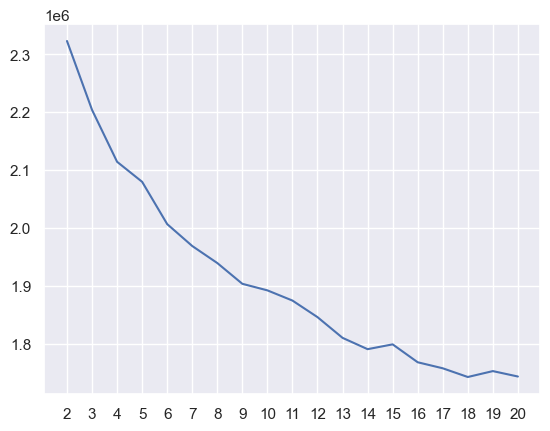

In [20]:
import matplotlib.pyplot as plt

_ = plt.plot(list(range(2, clusters_range)), [km.inertia_ for km in clustering_models])
_ = plt.xticks(list(range(2, clusters_range)))

# g = sns.lineplot([km.inertia_ for km in clustering_models])
# _ = g.set_xticklabels(list(range(2, clusters_range)))

In [21]:
np.unique(clustering_models[14 - 2].labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [22]:
len(clustering_models[14 - 2].labels_)

14811910

In [23]:
type(clustering_models[14 - 2].labels_)

numpy.ndarray

In [24]:
np.save("clusters.npy", clustering_models[14 - 2].labels_)